Problem: <br>
Expploring Data Analysis on SampleSuperStore dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Dataset Link: https://drive.google.com/file/d/1lV7is1B566UQPYzzY8R2ZmOritTW299S/view

In [2]:
data = pd.read_csv('SampleSuperstore.csv')
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


Data Preprocessing

1. Any Null Values in data?

In [5]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

From the above data we can say there are no null values present in the data

In [6]:
data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

By, Seeing the Columns we can say that Sales(independent) and Profit(dependent) are important coloumns 

In [7]:
data.shape

(9994, 13)

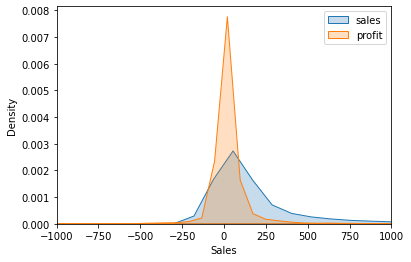

In [8]:
import seaborn as sns
sns.kdeplot(data['Sales'],label="sales",shade=True)
sns.kdeplot(data['Profit'],label="profit",shade=True)
plt.xlim(-1000,1000)
plt.legend()

Now, we will plot the pairplot 

In [9]:
data.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


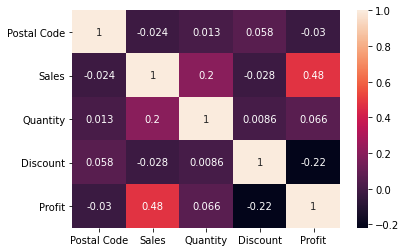

In [10]:
sns.heatmap(data.corr(),annot=True)

By seeing heat map we can clearly say that profit and sales are much related.<br>
Takeaways from graph is:
1. Sales and Profit are positivly correlated
2. Discounts and Profit are negatively Correlated

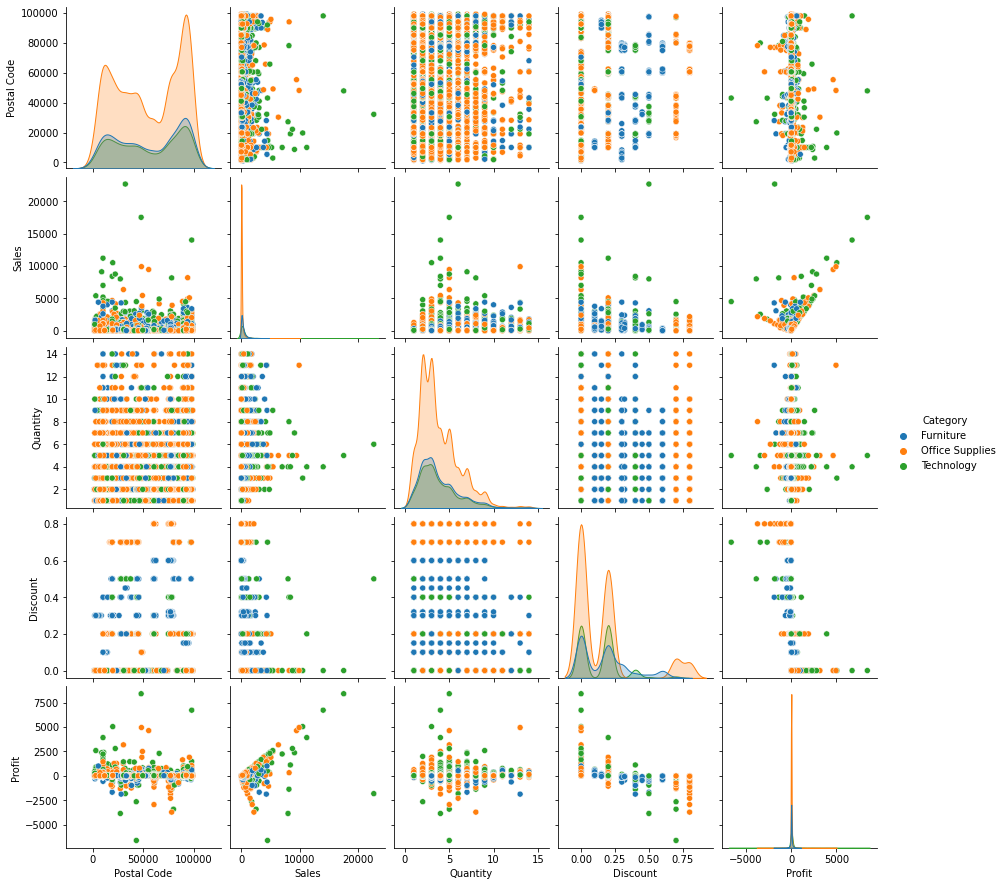

In [11]:
sns.pairplot(data,hue="Category")

Now, we will see which type of products are getting sold frequently

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


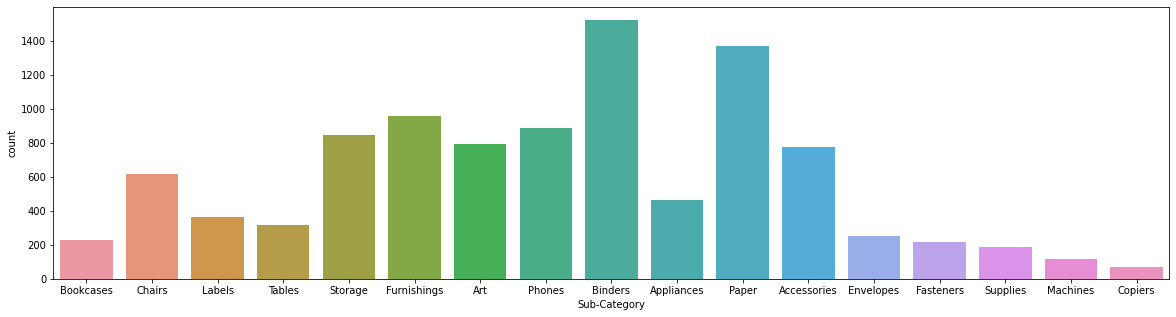

In [12]:
plt.figure(figsize=(20,5))
sns.countplot(data["Sub-Category"])

Takeaways:
1. In the retail store most of the people by Binders type of Category products, and show owner should maintain good of those category product.
2. And Recomendation is to Shop owner should give ads on the avg selling products like Tables, Labels, Appliances on those thing to boost the sales

Now, we will see state wise deals

Text(0, 0.5, 'No. of Orders')

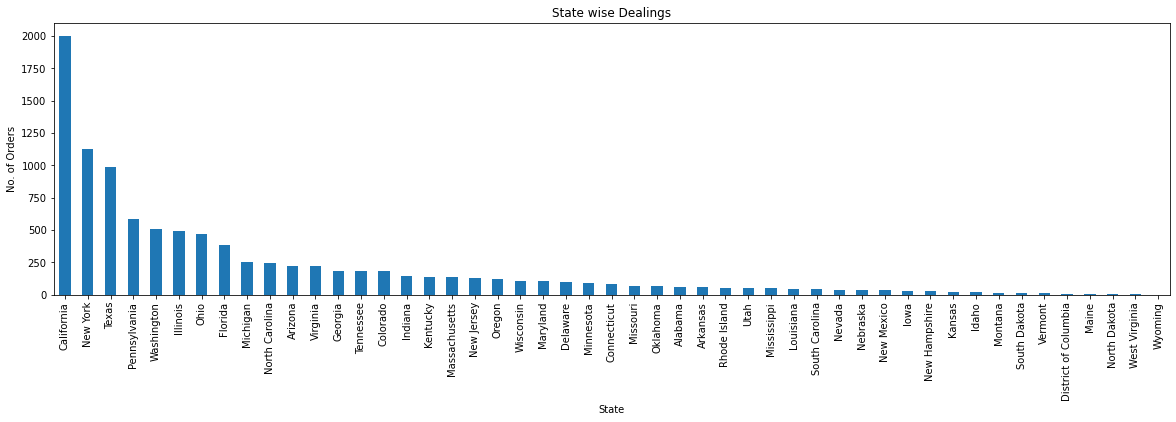

In [13]:
plt.title("State wise Dealings")
data["State"].value_counts().plot(kind="bar",figsize=(20,5))
plt.xlabel("State")
plt.ylabel("No. of Orders")

In [14]:
data["State"].value_counts().mean()

203.9591836734694

In [15]:
data["State"].value_counts().head(3)

California    2001
New York      1128
Texas          985
Name: State, dtype: int64

Text(0, 0.5, 'No. of Orders')

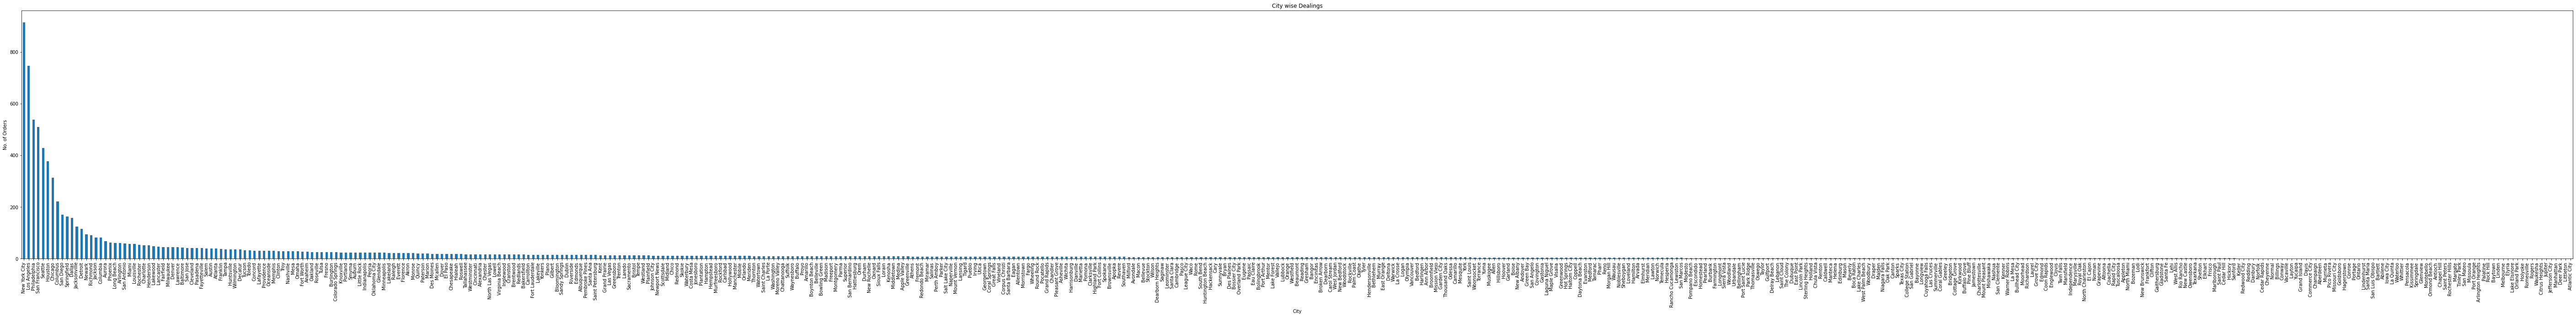

In [16]:
plt.title("City wise Dealings")
data["City"].value_counts().plot(kind="bar",figsize=(100,10))
plt.xlabel("City")
plt.ylabel("No. of Orders")

In [17]:
data["City"].value_counts().mean()

18.821092278719398

In [18]:
data["City"].value_counts().head(3)

New York City    915
Los Angeles      747
Philadelphia     537
Name: City, dtype: int64

In [19]:
data_subCategory = data.groupby(["Sub-Category"])['Sales','Profit','Discount'].mean()
data_subCategory

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Sales,Profit,Discount
Sub-Category,,,
Accessories,215.974604,54.111788,0.078452
Appliances,230.755710,38.922758,0.166524
Art,34.068834,8.200737,0.074874
Binders,133.560560,19.843574,0.372292
Bookcases,503.859633,-15.230509,0.211140
Chairs,532.332420,43.095894,0.170178
Copiers,2198.941618,817.909190,0.161765
Envelopes,64.867724,27.418019,0.080315
Fasteners,13.936774,4.375660,0.082028


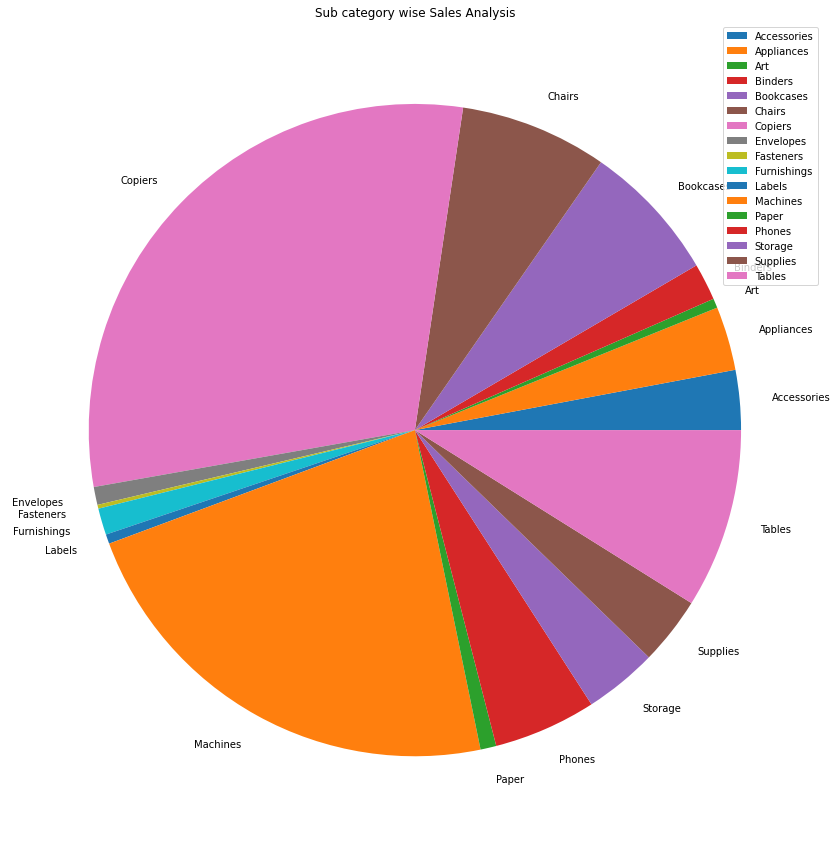

In [20]:
plt.figure(figsize=(15,15))
plt.pie(data_subCategory['Sales'],labels = data_subCategory.index)
plt.title("Sub category wise Sales Analysis")
plt.legend()
plt.show()

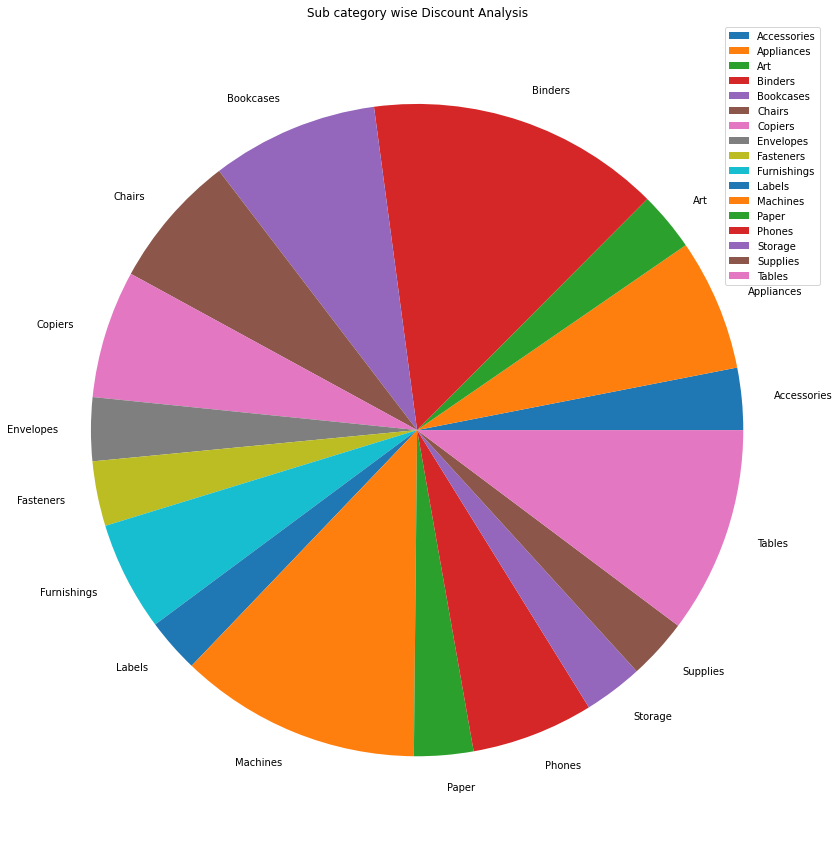

In [21]:
plt.figure(figsize=(15,15))
plt.pie(data_subCategory['Discount'],labels = data_subCategory.index)
plt.title("Sub category wise Discount Analysis")
plt.legend()
plt.show()

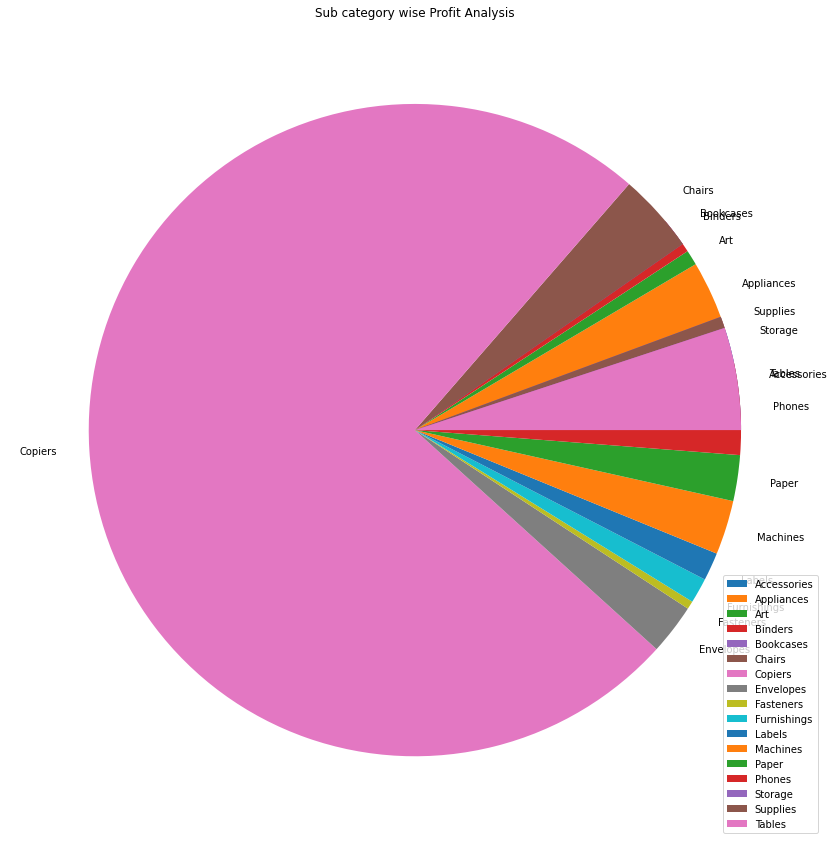

In [22]:
plt.figure(figsize=(15,15))
plt.pie(data_subCategory['Profit'],labels = data_subCategory.index)
plt.title("Sub category wise Profit Analysis")
plt.legend()
plt.show()